In [1]:
!git clone https://github.com/VasuVerma990/Stable-Diffusion

Cloning into 'Stable-Diffusion'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 57 (delta 15), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (57/57), 582.35 KiB | 7.56 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [2]:
%cd Stable-Diffusion

/content/Stable-Diffusion


In [3]:
!ls sd

attention.py  decoder.py    encoder.py		model_loader.py
clip.py       demo.ipynb    __init__.py		pipeline.py
ddpm.py       diffusion.py  model_converter.py	__pycache__


In [5]:
import os
print(os.getcwd())

/content/Stable-Diffusion


In [6]:
!wget https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt -O /content/Stable-Diffusion/data/v1-5-pruned-emaonly.ckpt


--2025-07-13 11:44:32--  https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
Resolving huggingface.co (huggingface.co)... 3.166.152.65, 3.166.152.110, 3.166.152.44, ...
Connecting to huggingface.co (huggingface.co)|3.166.152.65|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: /stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt [following]
--2025-07-13 11:44:32--  https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
Reusing existing connection to huggingface.co:443.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/66/6f/666f465fa70158515404e8de2c6bc6fe2f90c46f9296293aa14daededeb32c52/cc6cb27103417325ff94f52b7a5d2dde45a7515b25c255d8e396c90014281516?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27v1-5-pruned-emaonly.ckpt%3B+filename%3D%22v1-5-pruned-emaonly.ckpt%22%3B&Expir

In [7]:
!pip install lightning==2.0.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.9/370.9 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/88

In [8]:
from sd import model_loader
from sd import pipeline

In [9]:
from PIL import Image
from transformers import CLIPTokenizer
import torch
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device {DEVICE} ")

tokenizer = CLIPTokenizer("/content/Stable-Diffusion/data/vocab.json", merges_file = "/content/Stable-Diffusion/data/merges.txt")
model_file = "/content/Stable-Diffusion/data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)


/tmp/ipython-input-9-4095915854.py:12: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using device cpu 


100%|██████████| 50/50 [40:02<00:00, 48.04s/it]


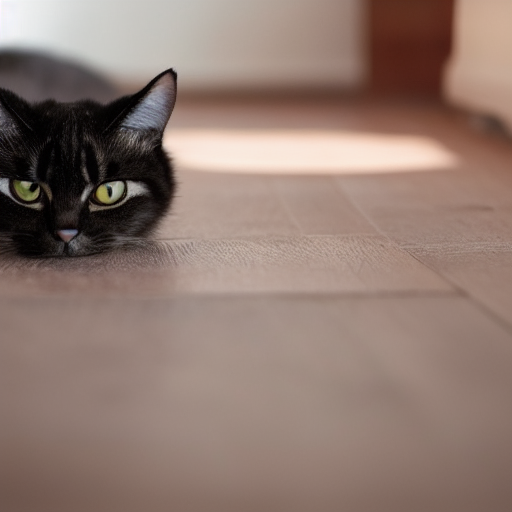

In [10]:
prompt = "A cat stretching on the floor"
uncond_prompt = " "
do_cfg = True
cfg_scale = 7

#IMAGE to IMAGE
input_image = None
image_path = ""
#input_image = Image.open(image_path)
strength = 0.9

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer
)

Image.fromarray(output_image)